In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Loaded the libraries

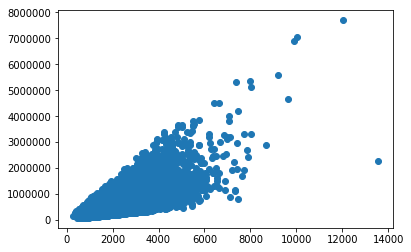

In [5]:
data = pd.read_csv('kc_house_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
data_train = pd.read_csv('kc_house_train_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
data_test = pd.read_csv('kc_house_test_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
plt.plot(data['sqft_living'],data['price'],'o')

In [11]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760.0,101930.0
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715.0,6819,2,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238.0,6819.0
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060.0,9711,1,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650.0,9711.0
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780.0,7470,1,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780.0,8113.0
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890.0,6560,2,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390.0,7570.0


In [17]:
def simple_regression_model(input_features,output):
    size = len(input_features)
    xy = input_features*output
    x2 = input_features**2
    sum_x = input_features.sum()
    sum_y = output.sum()
    sum_xy = xy.sum()
    sum_x2 = x2.sum()
    w1 = (sum_xy - (sum_x*sum_y)/size)/(sum_x2 - (sum_x**2)/size)
    w0 = (sum_y - (w1*sum_x))/size
    return (w0,w1)

# linear_regression function returns intercept and slope, given features and output

In [18]:
input_features = data_train['sqft_living']
output = data_train['price']

# Getting w0 and w1 using the simple regression model, method 1

In [23]:
w0,w1 = simple_regression_model(input_features,output)

# A function get_regression_prediction to get the predicted output 

In [24]:
def get_regression_prediction(input_features,w0,w1):
    data_train['predicted_price'] = w0 + w1*input_features
    return data_train['predicted_price']

In [26]:
print get_regression_prediction(input_features,w0,w1).head(10)

0    2.855954e+05
1    6.775181e+05
2    1.699922e+05
3    5.055232e+05
4    4.265748e+05
5    1.481101e+06
6    4.364433e+05
7    2.517603e+05
8    4.547707e+05
9    4.857861e+05
Name: predicted_price, dtype: float64


# A function to return the RSS

In [27]:
def get_residual_sum_of_squares(input_features,output,intercept,slope,):
    predicted_output = intercept + slope*input_features
    error = output - predicted_output
    return np.math.sqrt((error**2).sum())

In [28]:
print get_residual_sum_of_squares(input_features,output,w0,w1)

34668694.1516


# A function to return expected inputs given the output

In [30]:
def get_reverse_input(output,intercept,slope):
    expected_input = ( output - intercept )/slope
    return expected_input

In [32]:
print get_reverse_input(output,w0,w1).head(10)

0     954.096986
1    2075.182604
2     805.493736
3    2309.259323
4    1975.877329
5    4511.708449
6    1080.356549
7    1202.182842
8     981.051275
9    1312.659960
Name: price, dtype: float64


In [33]:
print get_reverse_input(800000,w0,w1)

3004.39624515


In [36]:
print data[data['price'] == 800000]['sqft_living'].mean()

2779.92982456


In [37]:
input_features2 = data_train['bedrooms']
w0_model2,w1_model2 = simple_regression_model(input_features2,output)

In [38]:
print "RSS using model 1 on sqft_living ",get_residual_sum_of_squares(data_test['sqft_living'],data_test['price'],w0,w1)
print "RSS using model 2 on sqft living ",get_residual_sum_of_squares(data_test['sqft_living'],data_test['price'],w0_model2
                                                                     ,w1_model2)
print "RSS using model 1 on bedrooms ",get_residual_sum_of_squares(data_test['bedrooms'],data_test['price'],w0,w1)
print "RSS using model 2 on bedrooms ",get_residual_sum_of_squares(data_test['bedrooms'],data_test['price'],w0_model2
                                                                     ,w1_model2)

RSS using model 1 on sqft_living  16595268.4105
RSS using model 2 on sqft living  18784563793.0
RSS using model 1 on bedrooms  44777991.8091
RSS using model 2 on bedrooms  22211811.8568
